# Exploratory Data Analysis (EDA)-Comcast Telecom Consumer Complaints 
## Introduction

Comcast is the largest American global telecommunication conglomerate. In October 2016, they received a fine of $2.3 million from the authorities after receiving over 1000 consumer complaints within the prior three months. The company's database serves as a repository of public customer complaints filed against Comcast. I will analyze the data from this database to help pin down what exactly was wrong with Comcast's customer service and how the firm could have improved.

## Data Dictionary

#### Ticket #: Ticket number assigned to each complaint
#### Customer Complaint: Description of complaint
#### Date: Date of complaint
#### Time: Time of complaint
#### Received Via: Mode of communication of the complaint
#### City: Customer city
#### State: Customer state
#### Zipcode: Customer zip
#### Status: Status of complaint
#### Filing on behalf of someone: If the complaint was filed on behalf of someone or not

## Objective

The aim of analyzing this data is to help Comcast identify areas they could focus on improving to improve customer satisfaction, thus reducing the likelihood of being reprimanded by the authorities in the future. To achieve this, I will be performing the following EDA steps on the dataset: 

- I will Plot a trend chart that depicts the number of complaints at monthly and daily granularity levels. This trend chart will help us determine the days and months with the highest number of complaints. 
- I will construct a table containing each complaint type's frequency. This table will help us determine the most frequent complaint types.
- I will create a new categorical variable with its values as Open and Closed. Open & Pending complaint status will be categorized as Open and Closed, and Solved will be tagged as Closed. This new variable will be used to plot a stacked bar chart that depicts the state-wise status of complaints. We will be able to visualize how adept each state is at resolving consumer complaints in the bar chart. 
- I will perform a calculation to determine the states with the maximum complaints and the highest percentage of unresolved complaints
- Lastly, I will perform a calculation to determine the percentage of resolved complaints that were received through the Internet and those that were received through customer care calls.




## Importing Relevant Libraries 

In [52]:
#importing libraries for data wrangling and calculation
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

## Importing and Reading the Dataset

In [53]:
df=pd.read_csv('/Users/Abdul/Desktop/datasets/Comcast_telecom_complaints_data.csv', parse_dates=['Date'])
df.sample(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2109,360636,Internet Speeds are Wacko,2015-06-24,24-Jun-15,12:32:32 AM,Internet,Walnut Creek,California,94595,Solved,No
271,228369,Comcast blocks HBO GO on PS4,2015-04-10,04-Oct-15,11:17:48 AM,Customer Care Call,Brandon,Mississippi,39047,Closed,No
1075,360167,Forced data capping,2015-06-23,23-Jun-15,9:07:30 PM,Internet,Knoxville,Tennessee,37909,Pending,Yes
1124,370440,Comcast in violation of merger terms,2015-06-27,27-Jun-15,7:18:54 PM,Customer Care Call,League City,Texas,77539,Solved,No
1686,355105,Comcast has been over charging us.,2015-06-22,22-Jun-15,8:48:45 AM,Internet,Rio Grande,New Jersey,8242,Solved,No


## Trend Chart for the number of Complaint at Monthly Granularity Level
### Observation
- The firm received its highest number of complaints in June


In [54]:
#importng the datetime library to separate the date into year, month, and day. 
#This is needed to plot the trend chart at monthly and daily granularity levels
import datetime
#isolating the year from the date and assigning it into a new variable, YYYY
df['YYYY'] = df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y'))
#isolating the month from the date and assigning it into a new variable, MM
df['MM']   = df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%m'))
#isolating the day from the date and assigning it into a new variable, DD
df['DD']   = df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%d'))

In [55]:
# viewing the new dataframe with the three newly created variables
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,YYYY,MM,DD
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,04,22
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,04,08
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,04,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,05,07
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,05,26


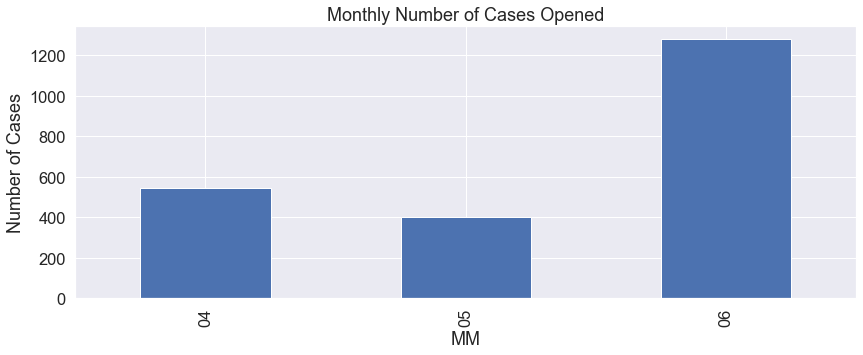

In [56]:
#plotting the trend chart 
df.groupby('MM').size().plot.bar(figsize=(14,5), ylabel='Number of Cases', title='Monthly Number of Cases Opened');

## Trend Chart for the number of Complaint at Daily Granularity Level
### Observation
- A significant portion of the complaints was recieved around the 25th of June. 
- This spike may be as a result of certain events that occured around that time; therefore, it should be investigated

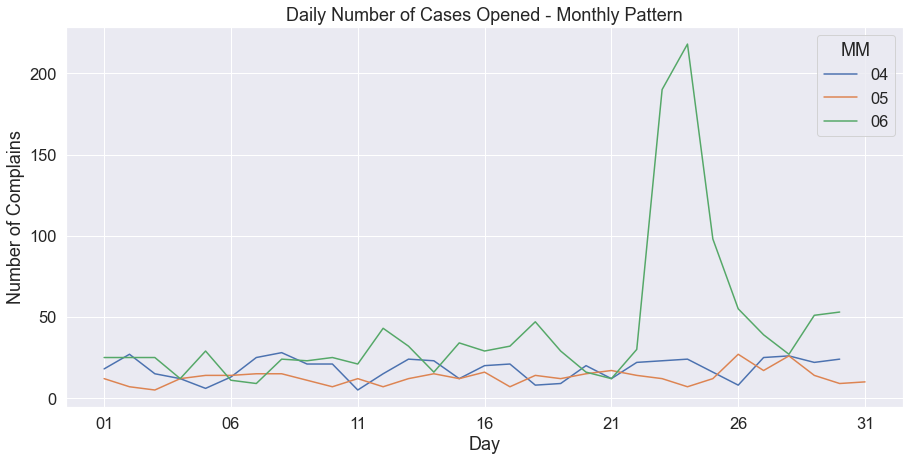

In [57]:
#plotting the trend chart 
df.groupby(['DD','MM']).size().unstack().plot(figsize=(15,7),xlabel='Day',ylabel='Number of Complains', title='Daily Number of Cases Opened - Monthly Pattern');



## A Table Displaying the Frequency of Complaint Types
### Observations
- Complaints unrelated to internet, billing, and speed are the most frequent
- Internet related complaints are also exceedingly frequent 

In [58]:
#viewing the description of complaints 
df['Customer Complaint']

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

In [59]:
import re
#defining a function to group complaint types that are not internet, billing, or speed related as others
def create_c_types(c_descp):

    r = re.compile(r'\bBILLING\b | \bINTERNET\b | \bSPEED\b', flags=re.I | re.X)

    ret = r.findall(c_descp)
    
    if not ret:
        ret = ['OTHERS']
        
    return ret

In [60]:
#Applying the function defined above to the  custumore complaint column 
df['New_complaint_type'] = df['Customer Complaint'].apply(create_c_types)

In [61]:
# confirming the new complaint type column
df['New_complaint_type'].sample(25)

486              [OTHERS]
651              [OTHERS]
293            [Internet]
387              [OTHERS]
1968           [internet]
1190             [OTHERS]
1416           [Internet]
1668    [Internet, Speed]
2183             [OTHERS]
1330             [OTHERS]
519              [OTHERS]
165              [OTHERS]
1038             [OTHERS]
1377           [internet]
505              [OTHERS]
55               [OTHERS]
1198           [internet]
1599            [billing]
2154             [OTHERS]
350     [Internet, Speed]
858              [OTHERS]
600              [OTHERS]
1519             [OTHERS]
453            [Internet]
1502           [internet]
Name: New_complaint_type, dtype: object

In [62]:
#checking the frequency of each complaint type
df['New_complaint_type'].value_counts()

[OTHERS]                       1385
[Internet]                      260
[internet]                      160
[Billing]                       142
[billing]                       108
[speed]                          27
[Internet, Speed]                23
[Internet, speed]                20
[Speed]                          19
[Internet, Billing]              17
[internet, speed]                11
[speed, internet]                 8
[INTERNET]                        7
[internet, billing]               6
[BILLING]                         5
[billing, internet]               3
[internet, internet]              3
[Speed, Internet]                 3
[speed, billing]                  2
[Speed, internet]                 2
[billing, speed]                  1
[Speed, speed]                    1
[internet, Billing]               1
[billing, billing]                1
[Billing, Internet]               1
[Billing, internet]               1
[INTERNET, BILLING]               1
[Billing, billing]          

# A Stacked Bar Graph Displaying the Statewise Stastus of Complaints
## Observations
- California, Georgia,Florida, and Tenessee appears to have the highest numbers of unresolved cases.
- However, these four states are among the states that received the highest numbers of complaints; therefore, it is best to also calcualate the percentage of unresolved cases in each state.

In [63]:
#Creating a dictionary to replace the Status Variable with new values. Open & Pending are categorized as Open, and Closed and Solved are categorized as Closed.
updated_status={'Status': {'Closed': 'Closed',
                           'Pending':'Open',
                           'Open': 'Open',
                           'Solved':'Closed'}
            
           }
updated_status

{'Status': {'Closed': 'Closed',
  'Pending': 'Open',
  'Open': 'Open',
  'Solved': 'Closed'}}

In [64]:
#replacing the status variable with the dictionary created above
df.replace(updated_status, inplace=True)

In [65]:
#confirming the the updated values in the status variable 
df['Status'].unique()

array(['Closed', 'Open'], dtype=object)

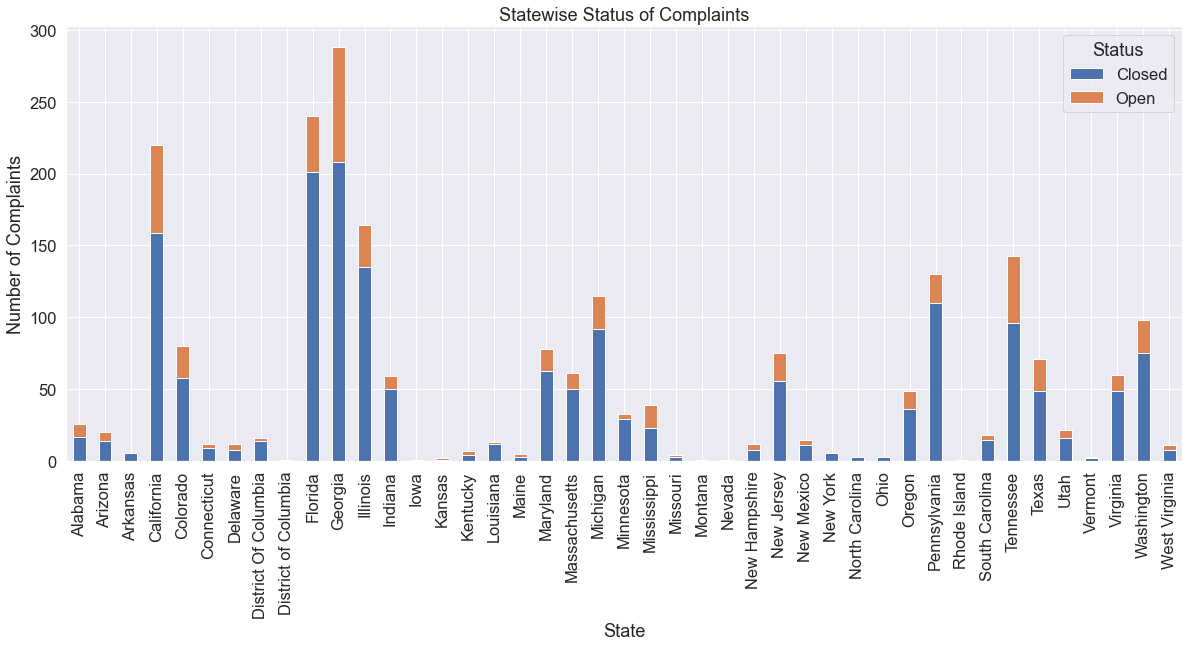

In [66]:
#plotting the stacked bar chart  with the two values
df.groupby(['State','Status']).size().unstack().plot.bar(ylabel='Number of Complaints', title= 'Statewise Status of Complaints', figsize=(20,8),stacked=True);

## States with the Highest Number of Complaints
### Observations
- Georgia is the state with the highest number of complaints.
- Most of the states that appear at the top of the ranking are states with large populations. Therefore, high numbers of complaints coming from these states are expected.
- Georgia’s population is small compared to California or Florida, yet more complaints come from Georgia than those states.


In [67]:
df['State'].value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Delaware                 12
New Hampshire            12
Connecticut              12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
Ohio                      3
Vermont             

## States with the Highest Number of Unresolves Cases
### Observation
- Georgia is the state with the highest number of unresolved cases. This is expected considering the state's high number of complaints 

In [68]:
# Filtering the Original Dataframe for Unresolved Cases 
df['unresolved'] = df['Status'].apply(lambda x: x == 'Open' or x== 'Pending')

In [69]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,YYYY,MM,DD,New_complaint_type,unresolved
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,04,22,[Internet],False
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,04,08,[OTHERS],False
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,04,18,[Speed],False
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,05,07,[OTHERS],True
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No,2015,05,26,[OTHERS],False


In [70]:
#filtering to only rows where cases are still unresolved
df_unresolved = df[df['unresolved'] == True] 

In [71]:
# calculating the number of unresolved cases for each state
df_unresolved['State'].value_counts() # count the number of rows for each state

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Massachusetts           11
Virginia                11
Indiana                  9
Alabama                  9
Arizona                  6
Utah                     6
New Hampshire            4
Delaware                 4
Minnesota                4
New Mexico               4
Connecticut              3
West Virginia            3
South Carolina           3
Kentucky                 3
Maine                    2
District Of Columbia     2
Missouri                 1
Vermont                  1
Kansas                   1
Louisiana                1
Name: State, dtype: int64

## Percentage of Unresolved Cases for Each State
### Observations
- Kansas,Kentucky,Mississippi,Maine, and Alabama are the five states with the highest proportion of unresolved cases.

In [72]:
# checking the numbers of resolved and unresolved cases for each state. True indicates unresolved and false indicates resolved.
df.groupby(['State','unresolved']).size().unstack()

unresolved,False,True
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


In [81]:
# creating a new dataFrame that shows the number of resolved cases and unresolved cases for each state
status_by_state = df.groupby(['State','unresolved']).size().unstack().reset_index()
# filling NA with zeros because NA means zero in this case
status_by_state.fillna(0,inplace=True)
status_by_state[:5]

unresolved,State,False,True
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0


In [74]:
# creating another column named case_count to show the sum of resolved cases for each state
status_by_state['case_count'] = (status_by_state[False] + status_by_state[True])
status_by_state[:5]

unresolved,State,False,True,case_count
0,Alabama,17.0,9.0,26.0
1,Arizona,14.0,6.0,20.0
2,Arkansas,6.0,NaN,NaN
3,California,159.0,61.0,220.0
4,Colorado,58.0,22.0,80.0


In [75]:
# calculating the proportion of unresolved cases for each state and assigning the resulting values to a new column named proportion_unresolved
status_by_state['proportion_unresovled'] = status_by_state[True] / status_by_state['case_count']
#soring the values to see the states with the highest proportion of unresolved cases
status_by_state.sort_values(['proportion_unresovled'], ascending=False).head()

unresolved,State,False,True,case_count,proportion_unresovled
14,Kansas,1.0,1.0,2.0,0.500000
15,Kentucky,4.0,3.0,7.0,0.428571
22,Mississippi,23.0,16.0,39.0,0.410256
17,Maine,3.0,2.0,5.0,0.400000
0,Alabama,17.0,9.0,26.0,0.346154


## The Percentage of Complaints, Received Through the Internet and Customer Care Calls, that were Resolved
### Observations
- 77% of Complaints received via Customer Care Call were resolved.
- 76% of complaints recieved via the internet were resolved.
- The means by which customers lodged thier complaints did not affect the likelihood of thier compliants being resolved.

In [76]:
df['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [77]:
resolved_by_complaint_source=df.groupby(['Received Via', 'Status']).size().unstack().reset_index()
resolved_by_complaint_source.head()

Status,Received Via,Closed,Open
0,Customer Care Call,864,255
1,Internet,843,262


In [78]:
resolved_by_complaint_source['case_count'] = (resolved_by_complaint_source['Closed'] + resolved_by_complaint_source['Open'])
resolved_by_complaint_source[:5]

Status,Received Via,Closed,Open,case_count
0,Customer Care Call,864,255,1119
1,Internet,843,262,1105


In [79]:
resolved_by_complaint_source['proportion_resovled'] = resolved_by_complaint_source['Closed'] / resolved_by_complaint_source['case_count']
resolved_by_complaint_source.sort_values(['proportion_resovled'], ascending=False).head()

Status,Received Via,Closed,Open,case_count,proportion_resovled
0,Customer Care Call,864,255,1119,0.772118
1,Internet,843,262,1105,0.762896
